To run:
    
1) Install GRISMCONF from https://github.com/npirzkal/GRISMCONF

2) Install GRISM_NIRCAM (NIRCAM configuration files) from https://github.com/npirzkal/GRISM_NIRCAM  
    

In [1]:
import glob, os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<H2>Import NIRCAM Grism Simulator</H2>

In [2]:
import NIRCAM_Gsim 

In [3]:
dir(NIRCAM_Gsim)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [5]:
NIRCAM_Gsim.observation

AttributeError: module 'NIRCAM_Gsim' has no attribute 'observation'

<h2>Define Grism mode and cross filter</h2>

In [3]:
mode = "modA_C"
cross_filter = "F444W"
config = "/Users/npirzkal/Dropbox/GRISMDATA/NIRCAM/NIRCAM_%s_%s.conf" % (cross_filter,mode)
print (config)

/Users/npirzkal/Dropbox/GRISMDATA/NIRCAM/NIRCAM_F444W_modA_C.conf


<h2>Define the NIRCAM images and Segmenation map to use</h2>

In [4]:
path = "/Users/npirzkal/Dropbox/ERS/Steve/Simul/"

image_names = glob.glob(os.path.join(path,"NIRCAM_215.016290_52.951720_F*.fits"))
seg_data = fits.open(os.path.join(path,"seg_215.016290_52.951720.fits"))[0].data


<h2>Load Segmentation Map</h2>

In [5]:
seg_data = fits.open("/Users/npirzkal/Dropbox/ERS/Steve/Simul/seg_215.016290_52.951720.fits")[0].data

In [6]:
print("Seg file is:",np.shape(seg_data))

Seg file is: (2448, 2448)


<h2>Initialize Scene</h2>

In [10]:
from observation import onservation

ModuleNotFoundError: No module named 'observation'

In [9]:
this_one = NIRCAM_Gsim.observation(image_names,seg_data,config,order="+1",max_split=2)

AttributeError: module 'NIRCAM_Gsim' has no attribute 'observations'

In [8]:
this_one.disperse_all()

NameError: name 'this_one' is not defined

In [11]:
simul = this_one.simulated_image[200:-200,200:-200]
background = "/Users/npirzkal/Dropbox/GRISMDATA/NIRCAM/%s_%s_V2.fits" % (cross_filter,mode)
simul2 = simul + fits.open(background)[0].data

fits.writeto("test.fits",simul,clobber=True)
fits.writeto("test2.fits",simul,clobber=True)


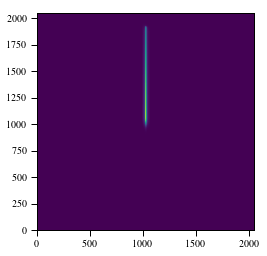

In [12]:
im = plt.imshow(simul,origin="lower")
im.set_clim(0,.1)

0.788272743272


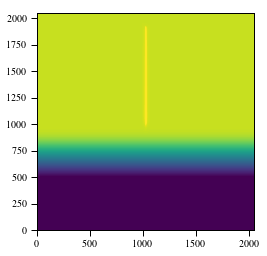

In [13]:
im = plt.imshow(simul2,origin="lower")
print np.mean(simul2)
im.set_clim(.6,1.)